# Supervised Learning: Linear Models

In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from IPython.display import display

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Overview

이번장에서는 linear regression 으로 대표되는 선형 모델들을 다루겠습니다.

| Type | Algorithm | Datasets |
|--|--|--|
| Regression | Linear Regression (OLS), Ridge, Lasso | make_wave, boston, make_circle, make_moons |
| Classification | Logistic Regression, SVC | make_forge, breast_cancer |

## Regression

| Algorithm | Parameter / Desc |
|--|--|
| LinearRegression (OLS) | No parameters |
| Ridge | alpha parameter needs to set. L1 regularization |
| Lasso | alpha parameter needs to set. L2 regularization |

우선, 4개의 regression dataset 에 대해서 각각 알고리즘들을 모두 적용시키고, train, test 결과를 보겠습니다.

In [3]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

def compare_linear_regression(X_train, X_test, y_train, y_test, title=None, ax=None):
    models = [LinearRegression(), 
              Ridge(alpha=0.1), Ridge(alpha=1), Ridge(alpha=10),
              Lasso(alpha=0.0001, max_iter=100000),
              Lasso(alpha=0.01, max_iter=100000),
              Lasso(alpha=1, max_iter=100000)]

    def get_model_name(model):
        if str(model).startswith('LinearRegression'):
            return 'LinearRegression()'
        return str(model).split(',')[0]+')'
    
    df = []
    for model in models:
        fit = model.fit(X_train, y_train)
        df.append([get_model_name(model), fit.score(X_train, y_train), fit.score(X_test, y_test)])

    df = pd.DataFrame(df, columns=['name', 'train', 'test'])

    ax.bar(df.index-0.1, df['train'], width=0.2)
    ax.bar(df.index+0.1, df['test'], width=0.2)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['name'])
    ax.legend(['train', 'test'])
    if title:
        ax.set_title(title)

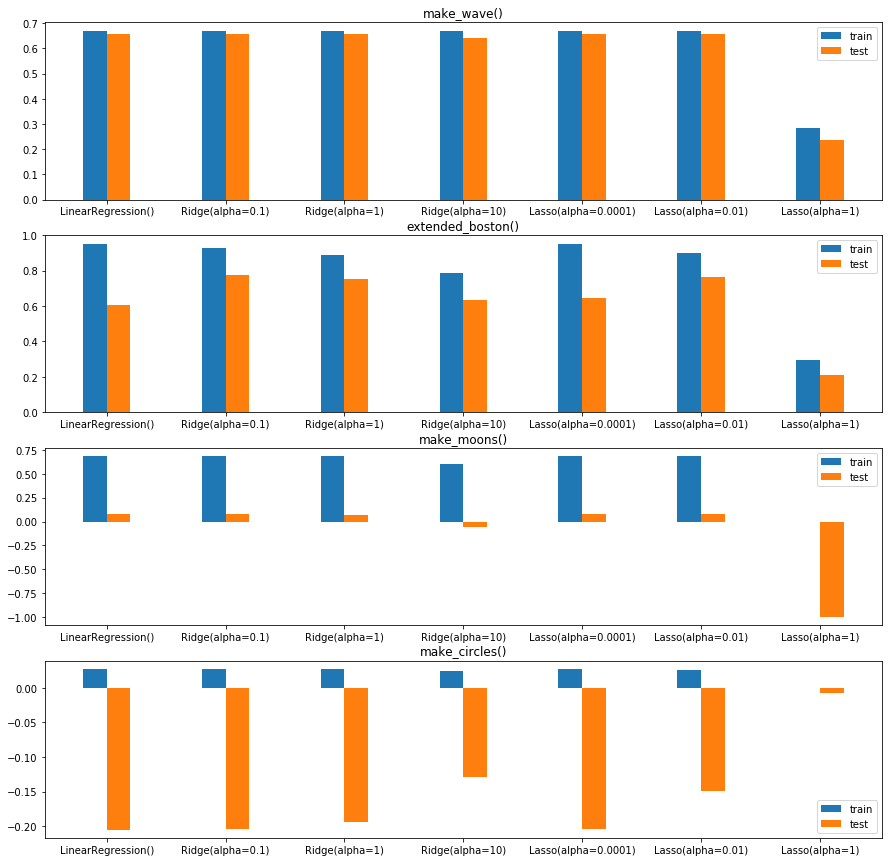

In [4]:
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

datasets = [(mglearn.datasets.make_wave(n_samples=60), 'make_wave()', 42),
            (mglearn.datasets.load_extended_boston(), 'extended_boston()', 0),
            (sklearn.datasets.make_moons(n_samples=60), 'make_moons()', 0),
            (sklearn.datasets.make_circles(n_samples=60), 'make_circles()', 0)
           ]

for i, dataset in enumerate(datasets):
    (X, y), title, random_state = dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    compare_linear_regression(X_train, X_test, y_train, y_test, title=title, ax=axes[i])

`make_moons()`에서 적용이 잘 안되는 듯 싶다가, `make_circles()` 에서는 아예 마이너스의 결과가 나옵니다. 아무래도 선형 모델을 만들다보니 아예 non-linear 데이터를 가지고 있는 경우에는 잘 안먹히는 듯 합니다.

`alpha`에 따라서 테스팅 결과가 달라집니다. 하지만, 유의미한 차이를 찾는건 어려워보입니다. 책에서 사용한 방법대로 `alpha`의 변화에 따른 distribution을 살펴보겠습니다.

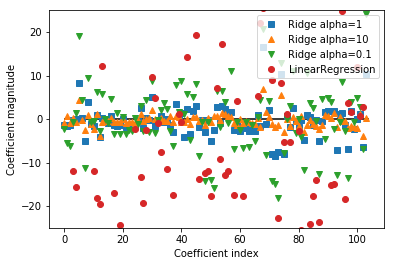

In [5]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

lr = LinearRegression().fit(X_train, y_train)
r = Ridge().fit(X_train, y_train)
r10 = Ridge(alpha=10).fit(X_train, y_train)
r01 = Ridge(alpha=0.1).fit(X_train, y_train)

plt.plot(r.coef_, 's', label='Ridge alpha=1')
plt.plot(r10.coef_, '^', label='Ridge alpha=10')
plt.plot(r01.coef_, 'v', label='Ridge alpha=0.1')
plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(loc='upper right');

`alpha`의 값을 정하는 것은 Chapter 5 에서 배운다고 합니다.

여기서 알아둘 것은 `alpha` 값이 작아지면 coefficient 의 variation 이 커진다는 것입니다. 즉, 값이 작으면 덜 restrictive 한다는건데요.

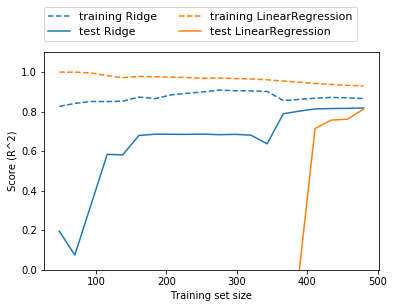

In [6]:
mglearn.plots.plot_ridge_n_samples()

책에 나온대로 교훈을 적어보면요. (data size vs regularization)

    The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here when using the full dataset is just by chance).

다른 교훈은요. (data size vs training performance)

    Another interesting aspect is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

## Classification
`LogisticRegression`과 SVM의 `LinearSVC`을 돌려봅니다. 

`make_forge()`, `breast_cancer` 두 데이터 셋에서 돌려보겠습니다.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

def compare_linear_classification(X_train, X_test, y_train, y_test, title=None, ax=None):
    models = [LogisticRegression(C=0.01), LogisticRegression(C=1), LogisticRegression(C=100),
              LinearSVC()]

    def get_model_name(model):
        if str(model).startswith('LinearSVC'):
            return 'LinearSVC()'
        return str(model).split(',')[0]+')'
    
    df = []
    for model in models:
        fit = model.fit(X_train, y_train)
        df.append([get_model_name(model), fit.score(X_train, y_train), fit.score(X_test, y_test)])

    df = pd.DataFrame(df, columns=['name', 'train', 'test'])

    ax.bar(df.index-0.1, df['train'], width=0.2)
    ax.bar(df.index+0.1, df['test'], width=0.2)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['name'])
    ax.legend(['train', 'test'])
    if title:
        ax.set_title(title)

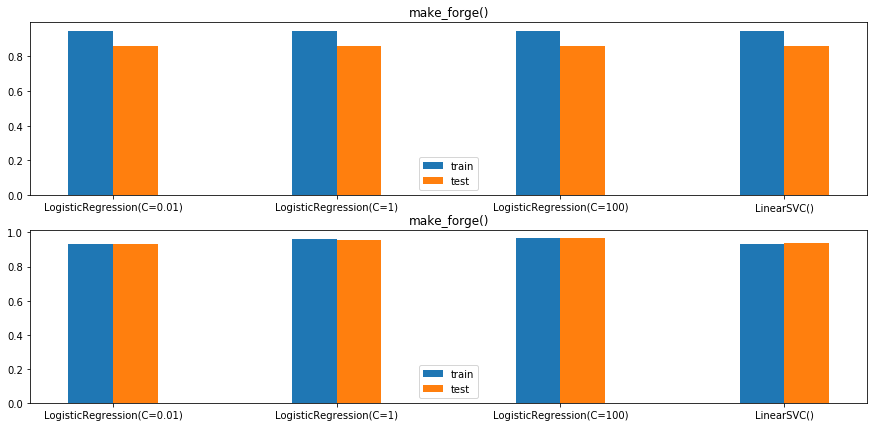

In [8]:
fig, axes = plt.subplots(2, 1, figsize=(15, 7))

datasets = [(mglearn.datasets.make_forge(), 'make_forge()', 0),
            (sklearn.datasets.load_breast_cancer(), 'breast_cancer()', 0)
           ]

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
compare_linear_classification(X_train, X_test, y_train, y_test, title='make_forge()', ax=axes[0])

cancer = sklearn.datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
compare_linear_classification(X_train, X_test, y_train, y_test, title='make_forge()', ax=axes[1])

두 데이터셋 모두 linear model 이 잘 먹히네요. 책에서 나온대로 더 visulaization 해보겠습니다.

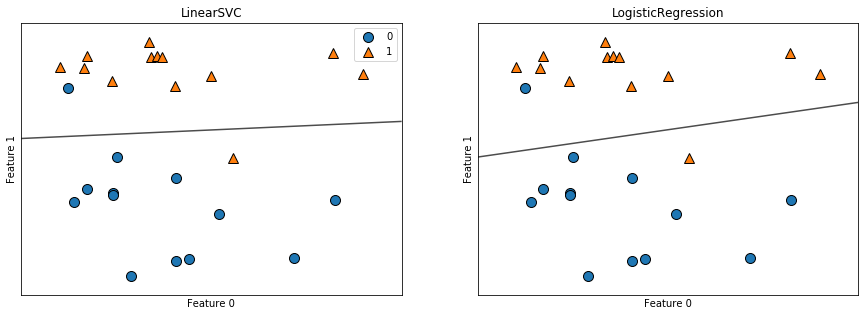

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(f'{clf.__class__.__name__}')
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend();

제가 이해한 바로는 `C`는 리그레션의 `alpha`와 반대의 역할을 합니다. 즉, `C`가 높으면 training set 을 최대한 가깝게 모델링 한다고 하네요.

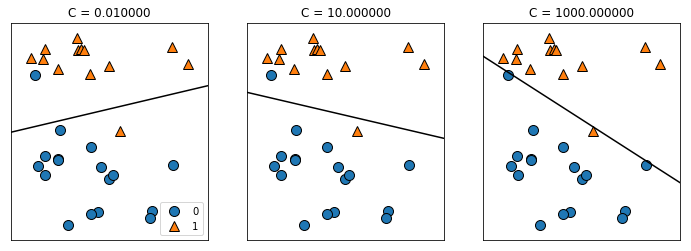

In [10]:
mglearn.plots.plot_linear_svc_regularization()

## Linear Models 장단점
- 데이터의 관계가 굉장히 non-linear 하면 잘 안통하는 듯 합니다 (`make_circles`, `make_moons`)
- Regularization parameter 정하는게 중요합니다. 보통 logarithmic scale로 테스트 해서 정한다네요.
    - large `alpha` = small `C` = more simple model
    - small `alpha` = large `C` = more like to training set
- When to use L1 and L2
    - If all your features are important: L1
    - Otherwise: L2
- For scalability,
    - Use `solver='sag'`
    - Use `SGDClassifier` and `SGDRegressor`
- Easy to understand
- Training 수보다 Feature 수가 많을 경우에 잘 통한다고 (잘 이해가 안됩니다.)